# Merge

Pendiente de la vez pasada

## Principales ideas:

- Merge funciona parecido a SQL
- La posta esta aca: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
- Que hacer si no coinciden las filas/columnas (los index o los names de la columnas): no ponerlas o poner NANs
- Ahi aparecen los criterios inner/outer/left/right
- Para concatenar: concat 
- Append es es un concat pero solo por filas, y por default no respeta lo index
- Para considerar contendido (a travez de uno o mas keys) y anexar columnas usamos merge
- Join es una version mas simple que usa los index. Y ademas es un metodo de un df y no de pd.


# Unix Timestamp


### Problemas comunes con los datos de tipo timestamp o datetime

Las fechas se guardan como valores numericos, pero hay que definir un monton de cosas arbitrarias:

  1. No esta clara la zona horaria (pueden ser naive o aware). referencia geografica. Mostra [mapa](https://es.wikipedia.org/wiki/Tiempo_universal_coordinado#/media/Archivo:World_Time_Zones_Map.png)
  2. No esta claro desde cuando se cuentan. Referencia temporal cero.
  3. No esta claro como se cuentan. Que dia es el primero de la semana? Lunes, Domingo? Se empieza en 1 o en 0? Que es la primer semana de un año?
  4. No esta claro las convenciones de lenguaje. Que fecha es 06/05/12? Es 6 de mayo de 1912? es 5 de junio de 2012?
  5. ¿Como hago para adaptar los print al idioma o convencion local?

De todo esto se encarga la libreria datetime. Esta libreria esta incluida en numpy y en pandas, pero en pandas tiene algunas diferencias tecnicas para que pueda servir de indice, por eso se llama timestamp. 

### Como se solucionan los problemas

1. Las fechas por default no tienen zona horaria, son naive, pero se les puede agregar con la informacion timezone que permite representar la informacion de la zona horaria como una propiedad de la fecha. En este caso se dice que es una fecha conciente (aware). Sino asume que esta en el uso horario local.
2. Las fecha se guardan como el numero de segundos que transcurrieron desde el 1ero de Enero de 1970 (en grenwich). Son el numero de segundos desde ese momento. El resto es adaptaciones de formato que hace la libreria.
3. Hay convenciones. En general se toma la fecha como segundos, horas, dias, meses y años. Pero hay metodos que permiten cuantificar de otras maneras, por ejemplo en semanas. Hay mas de un formato y depende que metodo usemos como representa la informacion, pero el numero es siempre el mismo.
4. Lo mismo que el punto anterior. Segun que metodos usemos podemos usar una convencion u otra. Hay metodos que permiten configurar formatos a medida y hay metodos que recuperan las convenciones de la configuracion local sel sistema operativo. 
5. Lo mismo.

### Principales tipos de fechas (tienen diferentes metodos)

- period / timedelta : Representa un tiempo transcurrido, es una diferencia entre dos fechas. Guarda la cantidad de dias, segundos y microsegundos, y tiene todos los metodos usuales para representar esa informacion. Es util cuando se quiere hacer operaciones entre tiempos. Como sumar, restar, comparar, o hacer intervalos periodicos. 
- time : Esta pensado para representar tiempos menores a un dia, tiene los metodos asociados.
- date : Esta pensado para representar las fechas en funcion de los dias desde 01/01/1970. Tiene los metodos asociados.
- timedate : combina toda la informacion de una fecha, es el equivalente a timestamp de pandas.
- timezone : sirve para manipular la informacion de la zona horaria.

  - Convenciones de formato de fechas: https://strftime.org/
  - Documentacion completa en español: https://docs.python.org/es/3/library/datetime.html




In [24]:
from datetime import datetime
# Vamos a crear una columna con fechas en formatos diversos
t = datetime.now()
print (t)
print (t.resolution)
print (datetime.now().timestamp())
datetime.now().ctime()
datetime.now().isoformat()

2022-10-13 16:13:47.604720
0:00:00.000001
1665688427.60572


'2022-10-13T16:13:47.605720'

In [25]:
import pytz
from datetime import datetime, timezone

t = datetime.now()
print (t)
t_a = datetime.now(pytz.timezone('Australia/Perth'))
print (t_a)
# Mostrar Colab

# Todas las computadoras dan el mismo timestamp lo que cambia entre una timestamp naive y uno aware es si el string se representa en el uso local o en otro especificado.

print (t.timestamp())
print (t_a.timestamp())

2022-10-13 16:13:47.685725
2022-10-14 03:13:47.686730+08:00
1665688427.685725
1665688427.68673


In [26]:
#for tz in pytz.all_timezones: 
#    print (tz)

In [27]:
import pandas as pd
t = pd.Timestamp.now() # pytz.timezone('America/Argentina/Buenos_Aires'))
#print (t)
t.year
t.month
t.month_name()
t.utcnow()
t.hour
t.week
t.ctime()
t.strftime("%B-%Y:%B") # Variar ejemplos
t.isocalendar() # Es tipo calendario, año, semana, dia de la semana
t.isoformat()
# Ver mas en https://strftime.org/ y https://docs.python.org/3/library/datetime.html#datetime.date.strftime

'2022-10-13T16:13:47.834721'

In [28]:
# Vamos a crear una columna con fechas en formatos diversos
import locale

locale.setlocale(locale.LC_TIME, 'esp')

fechas_str = ["13/03/11","11/2/2001","1-4-2001","110101","01Jan2001"]
data = pd.DataFrame({"Fechas Str":fechas_str})
data.head()
data["Fechas"] = pd.to_datetime(data["Fechas Str"])
data.head()
data["mes"] = data["Fechas"].apply(lambda x: x.month_name())
display (data.head())

,Fechas Str,Fechas,mes
0,13/03/11,2011-03-13,March
1,11/2/2001,2001-11-02,November
2,1-4-2001,2001-01-04,January
3,110101,2001-11-01,November
4,01Jan2001,2001-01-01,January


In [29]:
# Tambien podemos forzar el formato

print (pd.to_datetime('170901 100500', format='%y%m%d %H%M%S'))
print (pd.to_datetime('20170109 100500-10:30', format='%Y%d%m %H%M%S%z'))
print (pd.to_datetime('170901 100500', format='%y%d%m %H%M%S').timestamp())
print (pd.to_datetime('20170109 100500-10:30', format='%Y%m%d %H%M%S%z').timestamp())


2017-09-01 10:05:00
2017-09-01 10:05:00-10:30
1483956300.0
1483994100.0


# Discretizacion con pandas

## Situacion a resolver

Tenemos un dataset con notas de alumnos (los numeros son todos inventados pero son decimales y van de 0 a 10). Tenemos que pasar esas notas a categorias para los boletines donde:

0-2 es mal
2-4 es regular
4-7 es bien
7-9 es muy bien
9-10 es excelente.

y ademas despues sabemos que bien, muy bien y excelente son aprobados, regular y mal no. 

Como modificamos el dataset para hacerlo de manera rapida. 

Lo que necesitamos es pasar de una variable cuantitativa a una cualitativa y despues transformar y agrupar las categorias.




In [30]:
# Importamos las librerias

import numpy as np
import pandas as pd

In [31]:
# Generamos un dataset ficticio.

Mal = 2
Regular = 4
Bien = 7
Muy_Bien = 9
Excelente = 10

notas = np.random.randint(0,1000,80)/100  # Generamos enteros entre 0 y 10 ochenta veces
data = pd.DataFrame({"Notas":notas})
data.head(10)

,Notas
0,3.83
1,9.06
2,1.00
3,1.76
4,6.08
5,5.69
6,2.64
7,8.33
8,3.20
9,5.44


In [32]:
# Vamos a tratar de resolver la primer parte.
# Para eso queremos convertir una variable numerica en una categorica con rangos preestablecidos. La funcion pd.cut hace eso, pero necesita saber los bins
bins = [0, Mal, Regular, Bien, Muy_Bien, Excelente+0.01] # Recordar que ya definimos que es Mal, Bien, etc.
# Vamos a generar etiquetas (strings) que se correspondan a esas categorias
group_labels = ["Mal","Regular","Bien","Muy Bien","Excelente"]

Notas_categorizadas = pd.cut(data["Notas"], bins, right=True, include_lowest=True, labels=group_labels) # , right=False , labels=group_labels
Notas_categorizadas.head(10)
print (Notas_categorizadas.value_counts())
data["Categorias"] = Notas_categorizadas
data.head(10)


Bien         24
Mal          20
Regular      18
Muy Bien     12
Excelente     6
Name: Notas, dtype: int64


,Notas,Categorias
0,3.83,Regular
1,9.06,Excelente
2,1.00,Mal
3,1.76,Mal
4,6.08,Bien
5,5.69,Bien
6,2.64,Regular
7,8.33,Muy Bien
8,3.20,Regular
9,5.44,Bien


In [33]:
# Ahora queremos transformar la categorias con el criterio de aprobacion.
# Queremos agruparlas como aprobado y no aprobado.

# Para eso vamos a mapear (usar un diccionario para transformar valores)

dict_aprobacion = {"Mal":"Desaprobado","Regular":"Desaprobado","Bien":"Aprobado","Muy Bien":"Aprobado","Excelente":"Aprobado"}
data["Condicion"] = data["Categorias"].map(dict_aprobacion)
data.head(10)

,Notas,Categorias,Condicion
0,3.83,Regular,Desaprobado
1,9.06,Excelente,Aprobado
2,1.00,Mal,Desaprobado
3,1.76,Mal,Desaprobado
4,6.08,Bien,Aprobado
5,5.69,Bien,Aprobado
6,2.64,Regular,Desaprobado
7,8.33,Muy Bien,Aprobado
8,3.20,Regular,Desaprobado
9,5.44,Bien,Aprobado


In [34]:
# Generamos datos de ejemplo

datos = {
    "Candidato preferido": np.random.choice(["Candidato 1", "Candidato 2"], 1000, p=[0.45,0.55]),
    "Nivel_economico": np.random.choice(["Alto","Medio","Bajo"], 1000, p=[0.2,0.5,0.3]),
    "Nivel_educativo": np.random.choice(["Alto","Medio","Bajo"], 1000, p=[0.3,0.4,0.3]),
    "Comuna": np.random.choice(range(1,16),1000)
}

data = pd.DataFrame(datos)
data.head(10)

,Candidato preferido,Nivel_economico,Nivel_educativo,Comuna
0,Candidato 1,Alto,Bajo,15
1,Candidato 1,Medio,Alto,11
2,Candidato 2,Medio,Medio,3
3,Candidato 1,Medio,Bajo,13
4,Candidato 1,Medio,Bajo,14
5,Candidato 1,Alto,Alto,8
6,Candidato 1,Alto,Alto,1
7,Candidato 1,Medio,Alto,6
8,Candidato 2,Medio,Medio,3
9,Candidato 2,Medio,Bajo,2


In [35]:
# Queremos que la info de la comuna se "desdoble" en 15 columnas que digan si pertenece o no a esa comuna

# Usamos la funcion get_dummies

one_hot = pd.get_dummies(data["Comuna"], prefix = "Comuna", drop_first = True) #, prefix = "Comuna", drop_first = False) # Mencionar la colinealidad
one_hot.head()
data = data.drop(["Comuna"],axis = 1)
data = data.join(one_hot)
data.head()

#two_hot = pd.get_dummies(one_hot["Comuna_1"], prefix = "Comuna_1", drop_first = False)
#two_hot.head(15)

,Candidato preferido,Nivel_economico,Nivel_educativo,Comuna_2,Comuna_3,Comuna_4,Comuna_5,Comuna_6,Comuna_7,Comuna_8,Comuna_9,Comuna_10,Comuna_11,Comuna_12,Comuna_13,Comuna_14,Comuna_15
0,Candidato 1,Alto,Bajo,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Candidato 1,Medio,Alto,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,Candidato 2,Medio,Medio,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,Candidato 1,Medio,Bajo,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Candidato 1,Medio,Bajo,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [36]:
# Sobre variables categoricas: https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html

# Ejemplo de categorizacion con arbolado (vamos a repasar temas de la clase pasada)


In [1]:
# importamos las librerias y el dataset

import pandas as pd
import geopandas as gpd



# Descargamos y abrimos el archivo
comunas = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/comunas/comunas.csv")
arbolado = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/arbolado-publico-lineal/arbolado-publico-lineal-2017-2018.csv")

C:\Users\Ionatan\AppData\Local\Temp\ipykernel_2724\4104603199.py:10: DtypeWarning: Columns (2,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  arbolado = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/arbolado-publico-lineal/arbolado-publico-lineal-2017-2018.csv")


In [38]:
import shapely.wkt
import matplotlib.pyplot as plt

#Trasnformamos la columna WKT
comunas["WKT"] = comunas["WKT"].apply(shapely.wkt.loads) 
geo_comunas = gpd.GeoDataFrame(comunas, geometry='WKT')
geo_arbolado = gpd.GeoDataFrame(arbolado,geometry=gpd.points_from_xy(arbolado.long, arbolado.lat))



<AxesSubplot:>

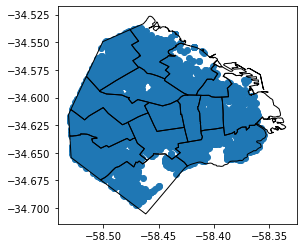

In [39]:
fig, ax = plt.subplots()

geo_arbolado.sample(10000).plot(ax=ax)
geo_comunas.plot(ax=ax, facecolor="none", edgecolor='black')

# Propuesta

Queremos hacer un mapa que muestre la edad de los arboles, para eso vamos a usar el grosor del tronco como indicador de la edad, pero hay que tener en cuenta varias cosas:

- No tenemos una referencia absoluta, por eso vamos a considerar la edad en terminos relativos al grosor del tronco de dicha especie.
- Tenemos que generar categorias comunes para todas las especies donde cetegoricemos en terminos relativos a la especie.
- Tenemos especies con poca poblacion, eso lo queremos ignorar.

In [40]:
# Empecemos por filtrar los arboles de los que hay mas especimenes.

geo_arbolado["nombre_cientifico"].value_counts()

nro_minimo_especimenes = 1000

geo_arbolado_filtrado = geo_arbolado.groupby(["nombre_cientifico"]).filter(lambda grp: grp.shape[0]>nro_minimo_especimenes)

print (geo_arbolado.shape)
print (geo_arbolado_filtrado.shape)
geo_arbolado_filtrado.dropna(subset=["diametro_altura_pecho"], inplace=True)

geo_arbolado_filtrado["nombre_cientifico"].value_counts()



(370180, 19)
(341224, 19)


Fraxinus pennsylvanica                 133532
Platanus x acerifolia                   32277
Ficus benjamina                         22491
Tilia x moltkei                         15595
Melia azedarach                         14901
Jacaranda mimosifolia                   13869
Lagerstroemia indica                    11884
Fraxinus americana                      10110
No identificado                          9386
Tipuana tipu                             9319
Ligustrum lucidum                        8952
Fraxinus excelsior                       8582
Ligustrum lucidum f. aureovariegata      7998
Liquidambar styraciflua                  5664
Acer negundo                             5167
Syagrus romanzoffiana                    3426
Styphnolobium japonicum                  2200
Tilia cordata                            2177
Persea americana                         1999
Robinia pseudoacacia                     1994
Ceiba speciosa                           1796
Citrus limon                      

In [41]:
geo_arbolado_filtrado["categoria_edad"] = geo_arbolado_filtrado.groupby(["nombre_cientifico"])['diametro_altura_pecho'].transform(lambda x: pd.qcut(x,5,labels=["joven","adulto_joven","adulto","adulto_viejo","viejo"]))

In [42]:
prueba = geo_arbolado_filtrado[["diametro_altura_pecho","nombre_cientifico"]].head(10)

display(prueba)
prueba.groupby(["nombre_cientifico"])['diametro_altura_pecho'].transform(lambda x: len(x))

,diametro_altura_pecho,nombre_cientifico
0,88.0,Tipuana tipu
2,7.0,Fraxinus pennsylvanica
3,9.0,Fraxinus pennsylvanica
4,13.0,Jacaranda mimosifolia
5,29.0,Fraxinus pennsylvanica
6,21.0,Fraxinus pennsylvanica
7,8.0,Jacaranda mimosifolia
8,38.0,Jacaranda mimosifolia
9,25.0,Tilia x moltkei
10,22.0,Fraxinus pennsylvanica


0     1
2     5
3     5
4     3
5     5
6     5
7     3
8     3
9     1
10    5
Name: diametro_altura_pecho, dtype: int64

In [43]:
display (geo_arbolado_filtrado)
display (geo_arbolado_filtrado[geo_arbolado_filtrado["nombre_cientifico"]=="Tipuana tipu"][["diametro_altura_pecho","categoria_edad","nombre_cientifico"]].head(20))
display (geo_arbolado_filtrado[geo_arbolado_filtrado["nombre_cientifico"]=="Fraxinus pennsylvanica"][["diametro_altura_pecho","categoria_edad","nombre_cientifico"]].head(20))

,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol,geometry,categoria_edad
0,-58.378563,-34.594902,26779,Lineal,1,NaN,Esmeralda,1000.0,1120.0,ESMERALDA 1120,NaN,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0,POINT (-58.379 -34.595),viejo
2,-58.379103,-34.591939,30904,Lineal,1,NaN,Arroyo,800.0,848.0,ARROYO 848,Exacta,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,7.0,6.0,POINT (-58.379 -34.592),joven
3,-58.380710,-34.591548,31336,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LD,Fraxinus pennsylvanica,NaN,Ocupada,Regular,A nivel,9.0,29.0,POINT (-58.381 -34.592),joven
4,-58.380710,-34.591548,31337,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LA,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,13.0,8.0,POINT (-58.381 -34.592),adulto_joven
5,-58.381043,-34.591584,31344,Lineal,1,NaN,Arroyo,900.0,970.0,ARROYO 970,Exacta,Fraxinus pennsylvanica,3.5,Ocupada,Regular,A nivel,29.0,15.0,POINT (-58.381 -34.592),adulto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370175,NaN,NaN,546140,Lineal,15,919,Guevara,1000.0,1000.0,NaN,LD3,Ceiba speciosa,3.3,Ocupada,Regular,A nivel,34.0,7.0,POINT (nan nan),adulto_joven
370176,NaN,NaN,546141,Lineal,15,919,Guevara,1000.0,1000.0,NaN,LD4,Melia azedarach,3.3,Ocupada,Regular,A nivel,45.0,8.0,POINT (nan nan),adulto_joven
370177,NaN,NaN,546142,Lineal,15,919,Guevara,1000.0,1000.0,NaN,LD5,Ceiba speciosa,3.3,Ocupada,Regular,A nivel,60.0,8.0,POINT (nan nan),adulto_viejo
370178,NaN,NaN,546143,Lineal,15,919,Guevara,1000.0,1000.0,NaN,LD6,Ceiba speciosa,3.3,Ocupada,Regular,A nivel,64.0,8.0,POINT (nan nan),adulto_viejo


,diametro_altura_pecho,categoria_edad,nombre_cientifico
0,88.0,viejo,Tipuana tipu
434,108.0,viejo,Tipuana tipu
435,80.0,viejo,Tipuana tipu
437,107.0,viejo,Tipuana tipu
438,80.0,viejo,Tipuana tipu
439,83.0,viejo,Tipuana tipu
440,71.0,adulto_viejo,Tipuana tipu
441,96.0,viejo,Tipuana tipu
582,60.0,adulto,Tipuana tipu
585,70.0,adulto_viejo,Tipuana tipu


,diametro_altura_pecho,categoria_edad,nombre_cientifico
2,7.0,joven,Fraxinus pennsylvanica
3,9.0,joven,Fraxinus pennsylvanica
5,29.0,adulto,Fraxinus pennsylvanica
6,21.0,adulto_joven,Fraxinus pennsylvanica
10,22.0,adulto_joven,Fraxinus pennsylvanica
11,28.0,adulto,Fraxinus pennsylvanica
12,45.0,viejo,Fraxinus pennsylvanica
20,23.0,adulto_joven,Fraxinus pennsylvanica
21,28.0,adulto,Fraxinus pennsylvanica
22,8.0,joven,Fraxinus pennsylvanica


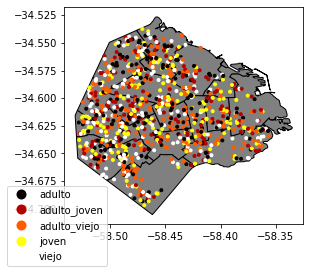

In [44]:
fig, ax = plt.subplots()

geo_comunas.plot(ax=ax, facecolor="gray", edgecolor='black')
geo_arbolado_filtrado.sample(1000).plot(ax=ax, column = "categoria_edad",legend=True, cmap='hot',  marker='.')
leg = ax.get_legend()
leg.set_bbox_to_anchor((0., 0., 0.2, 0.2))